# Covid-19 Chances Detection

#### Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

#### During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

#### The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

## Imports and Loading Dataset:

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

In [3]:
#For warnings-

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing Dataset-

df = pd.read_csv('D:/Covid_data.csv')

In [6]:
print(df)

         USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
0            2             1    1             1  03/05/2020       97   
1            2             1    2             1  03/06/2020       97   
2            2             1    2             2  09/06/2020        1   
3            2             1    1             1  12/06/2020       97   
4            2             1    2             1  21/06/2020       97   
...        ...           ...  ...           ...         ...      ...   
1048570      2            13    2             1  9999-99-99       97   
1048571      1            13    2             2  9999-99-99        2   
1048572      2            13    2             1  9999-99-99       97   
1048573      2            13    2             1  9999-99-99       97   
1048574      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
0                1   65         2         2  ...       2        2 

## Understanding Data:

In [5]:
#First step is getting familiar with the structure of the dataset-

df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

#### sex: 1 for female and 2 for male.
#### age: of the patient.
#### classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
#### degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
#### patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
#### pneumonia: whether the patient already have air sacs inflammation or not.
#### pregnancy: whether the patient is pregnant or not.
#### diabetes: whether the patient has diabetes or not.
#### copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
#### asthma: whether the patient has asthma or not.
#### inmsupr: whether the patient is immunosuppressed or not.
#### hypertension: whether the patient has hypertension or not.
#### cardiovascular: whether the patient has heart or blood vessels related disease.
#### renal chronic: whether the patient has chronic renal disease or not.
#### other disease: whether the patient has other disease or not.
#### obesity: whether the patient is obese or not.
#### tobacco: whether the patient is a tobacco user.
#### usmr: Indicates whether the patient treated medical units of the first, second or third level.
#### medical unit: type of institution of the National Health System that provided the care.
#### intubed: whether the patient was connected to the ventilator.
#### icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
#### date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [7]:
#Checking First 5 and Last 5 values-

df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [8]:
df.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [12]:
df.shape

(1048575, 21)

In [13]:
df.size

22020075

In [9]:
#let’ see that what are columns available in our dataset.

df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [10]:
#To know more about the dataset with transpose – here T is for the transpose

df.describe().T

,count,mean,std,min,25%,50%,75%,max
USMER,1048575.0,1.632194,0.482208,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,1048575.0,8.980565,3.723278,1.0,4.0,12.0,12.0,13.0
SEX,1048575.0,1.499259,0.500000,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1048575.0,1.190765,0.392904,1.0,1.0,1.0,1.0,2.0
INTUBED,1048575.0,79.522875,36.868886,1.0,97.0,97.0,97.0,99.0
PNEUMONIA,1048575.0,3.346831,11.912881,1.0,2.0,2.0,2.0,99.0
AGE,1048575.0,41.794102,16.907389,0.0,30.0,40.0,53.0,121.0
PREGNANT,1048575.0,49.765585,47.510733,1.0,2.0,97.0,97.0,98.0
DIABETES,1048575.0,2.186404,5.424242,1.0,2.0,2.0,2.0,98.0
COPD,1048575.0,2.260569,5.132258,1.0,2.0,2.0,2.0,98.0


## EDA:

In [11]:
#let’s check that if our dataset have null values or not

df.isnull().head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [14]:
df.CLASIFFICATION_FINAL.value_counts()

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

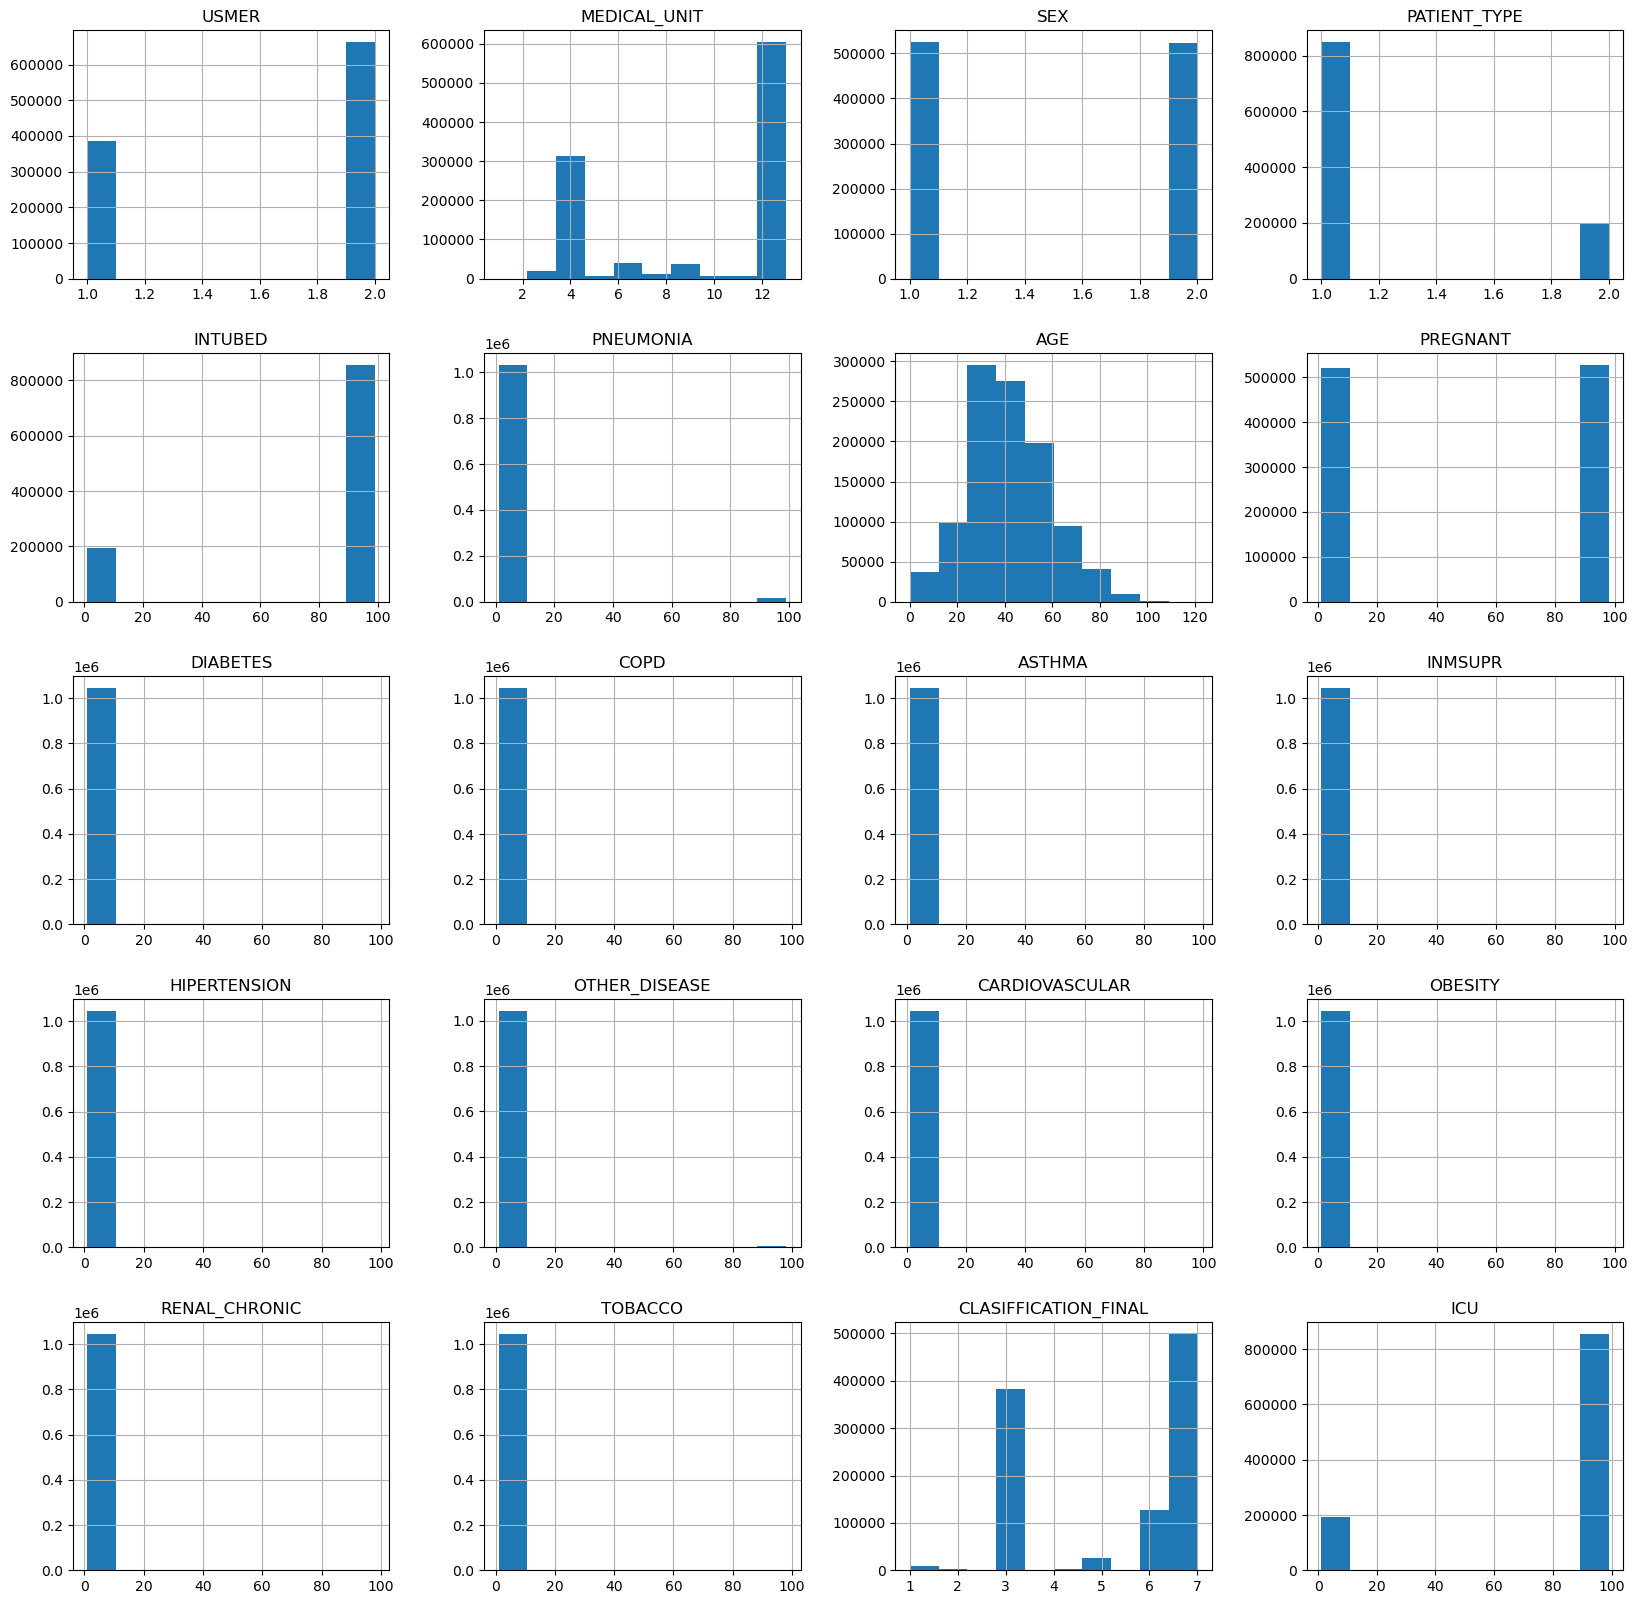

In [17]:
#Plotting the data distribution plots before removing null values

p = df.hist(figsize = (20,20))

In [18]:
#Correlation-

df_corr = df.corr()
df_corr

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
USMER,1.000000,0.127927,-0.001126,-0.190570,0.175457,-0.154950,-0.045088,-0.001469,0.014704,0.011030,0.010814,0.003234,0.014830,-0.015763,0.010097,0.014567,0.011527,0.010638,0.028840,0.174901
MEDICAL_UNIT,0.127927,1.000000,0.001475,-0.205413,0.205243,-0.046433,-0.082223,0.005300,0.019523,0.014209,0.013312,0.011785,0.020964,0.027453,0.014406,0.019577,0.014751,0.012282,0.079981,0.205141
SEX,-0.001126,0.001475,1.000000,0.089505,-0.089943,-0.012131,0.028367,0.992713,0.008888,0.009372,0.010415,0.007999,0.009257,0.009039,0.008174,0.009858,0.008249,0.004919,-0.057782,-0.089844
PATIENT_TYPE,-0.190570,-0.205413,0.089505,1.000000,-0.976335,0.022966,0.315193,0.088340,0.008743,0.019548,0.023042,0.024924,0.006852,0.036724,0.022175,0.019650,0.018873,0.022123,-0.183370,-0.975810
INTUBED,0.175457,0.205243,-0.089943,-0.976335,1.000000,0.079743,-0.317945,-0.088097,-0.009215,-0.020124,-0.023446,-0.024140,-0.007628,-0.035404,-0.022442,-0.020217,-0.019309,-0.022428,0.193075,0.999434
PNEUMONIA,-0.154950,-0.046433,-0.012131,0.022966,0.079743,1.000000,-0.073127,-0.007284,-0.004484,-0.005618,-0.005392,-0.000802,-0.004799,0.001612,-0.004758,-0.004276,-0.005287,-0.004325,0.075351,0.079691
AGE,-0.045088,-0.082223,0.028367,0.315193,-0.317945,-0.073127,1.000000,0.027257,0.004422,0.019048,0.022715,0.022820,-0.004964,0.022837,0.019489,0.015500,0.020124,0.021263,-0.152637,-0.317813
PREGNANT,-0.001469,0.005300,0.992713,0.088340,-0.088097,-0.007284,0.027257,1.000000,0.014707,0.015736,0.016765,0.014265,0.015335,0.014175,0.014378,0.015895,0.014392,0.010794,-0.057809,-0.087991
DIABETES,0.014704,0.019523,0.008888,0.008743,-0.009215,-0.004484,0.004422,0.014707,1.000000,0.828823,0.829349,0.781108,0.835018,0.634611,0.809417,0.752739,0.812657,0.771763,-0.004739,-0.009223
COPD,0.011030,0.014209,0.009372,0.019548,-0.020124,-0.005618,0.019048,0.015736,0.828823,1.000000,0.908929,0.852273,0.855249,0.687323,0.880097,0.814868,0.884032,0.836097,-0.010336,-0.020146


<Axes: >

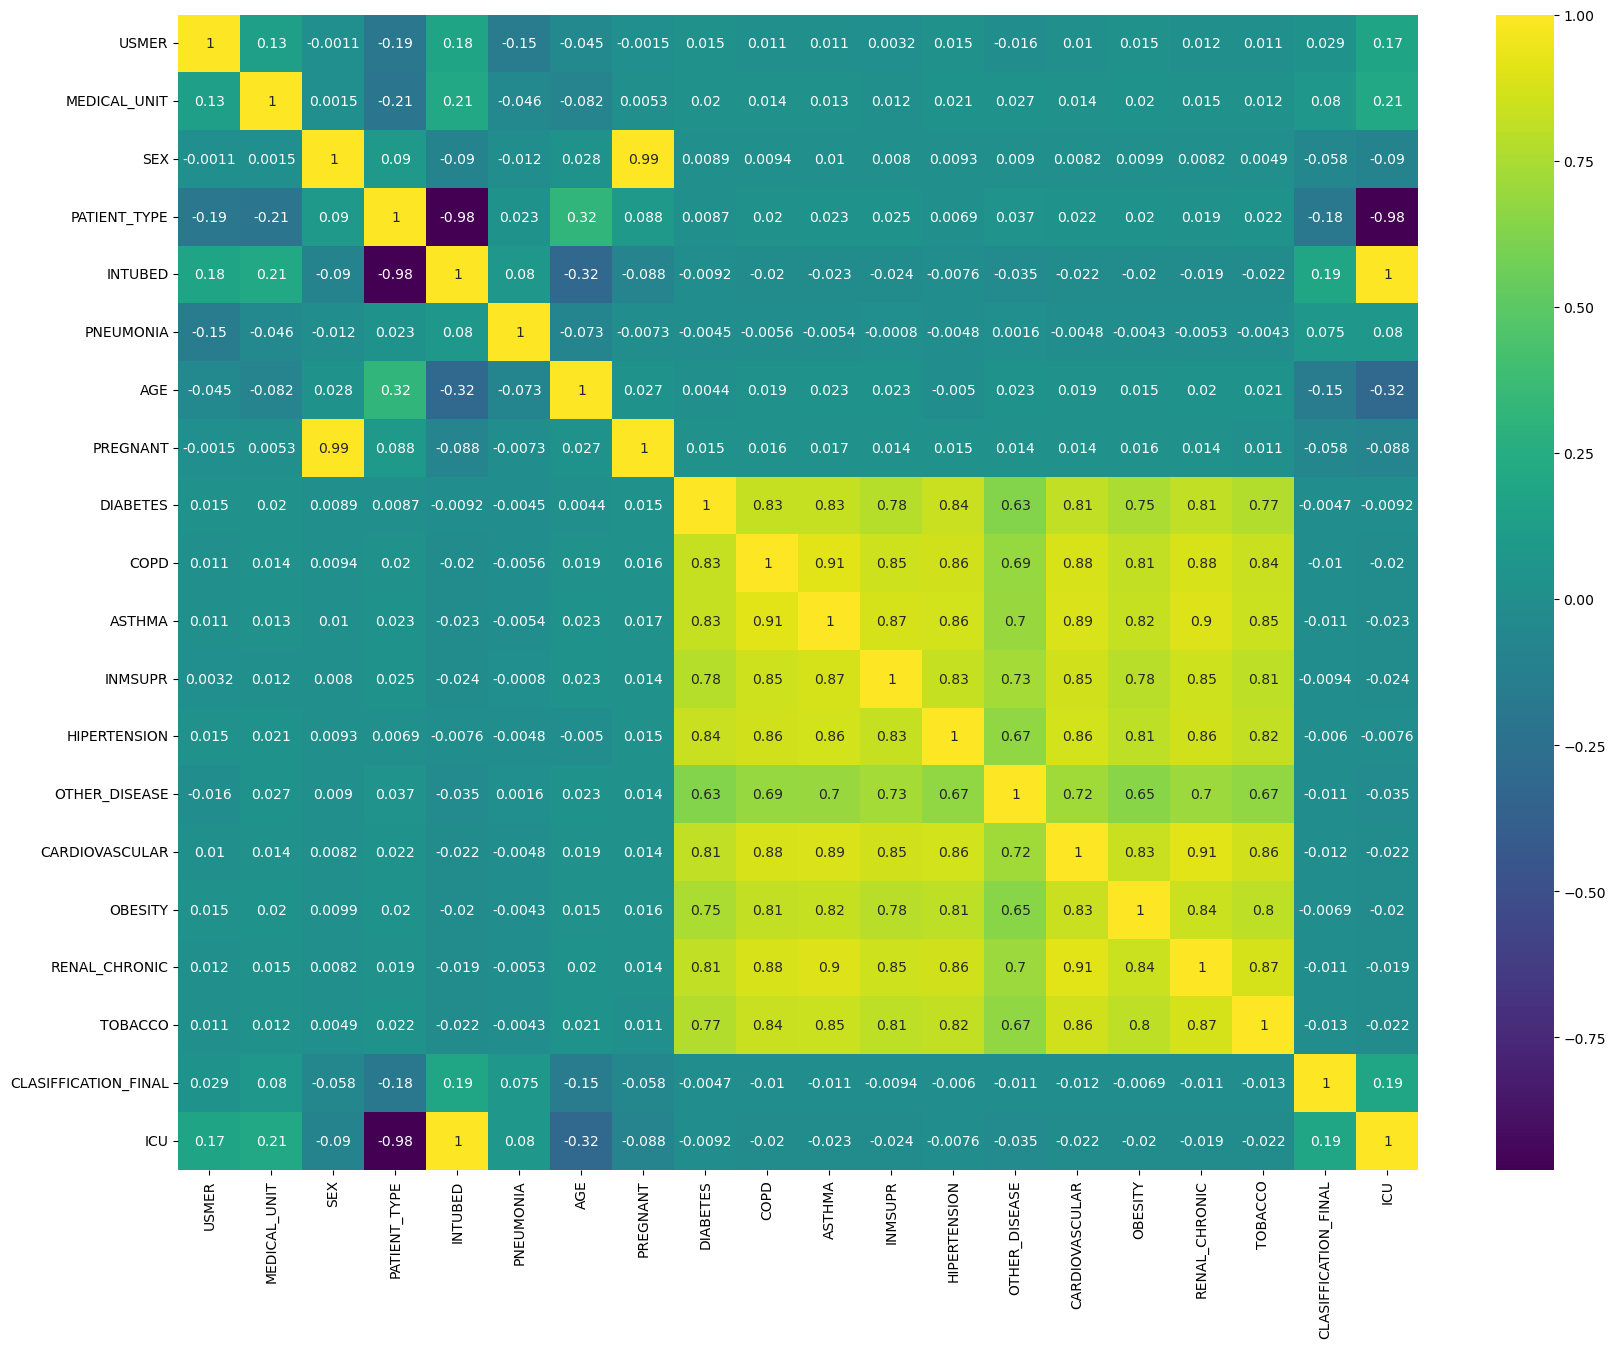

In [19]:
#Heatmap-

plt.figure(figsize = (20, 15))
sns.heatmap(df_corr, cmap = 'viridis', annot = True)

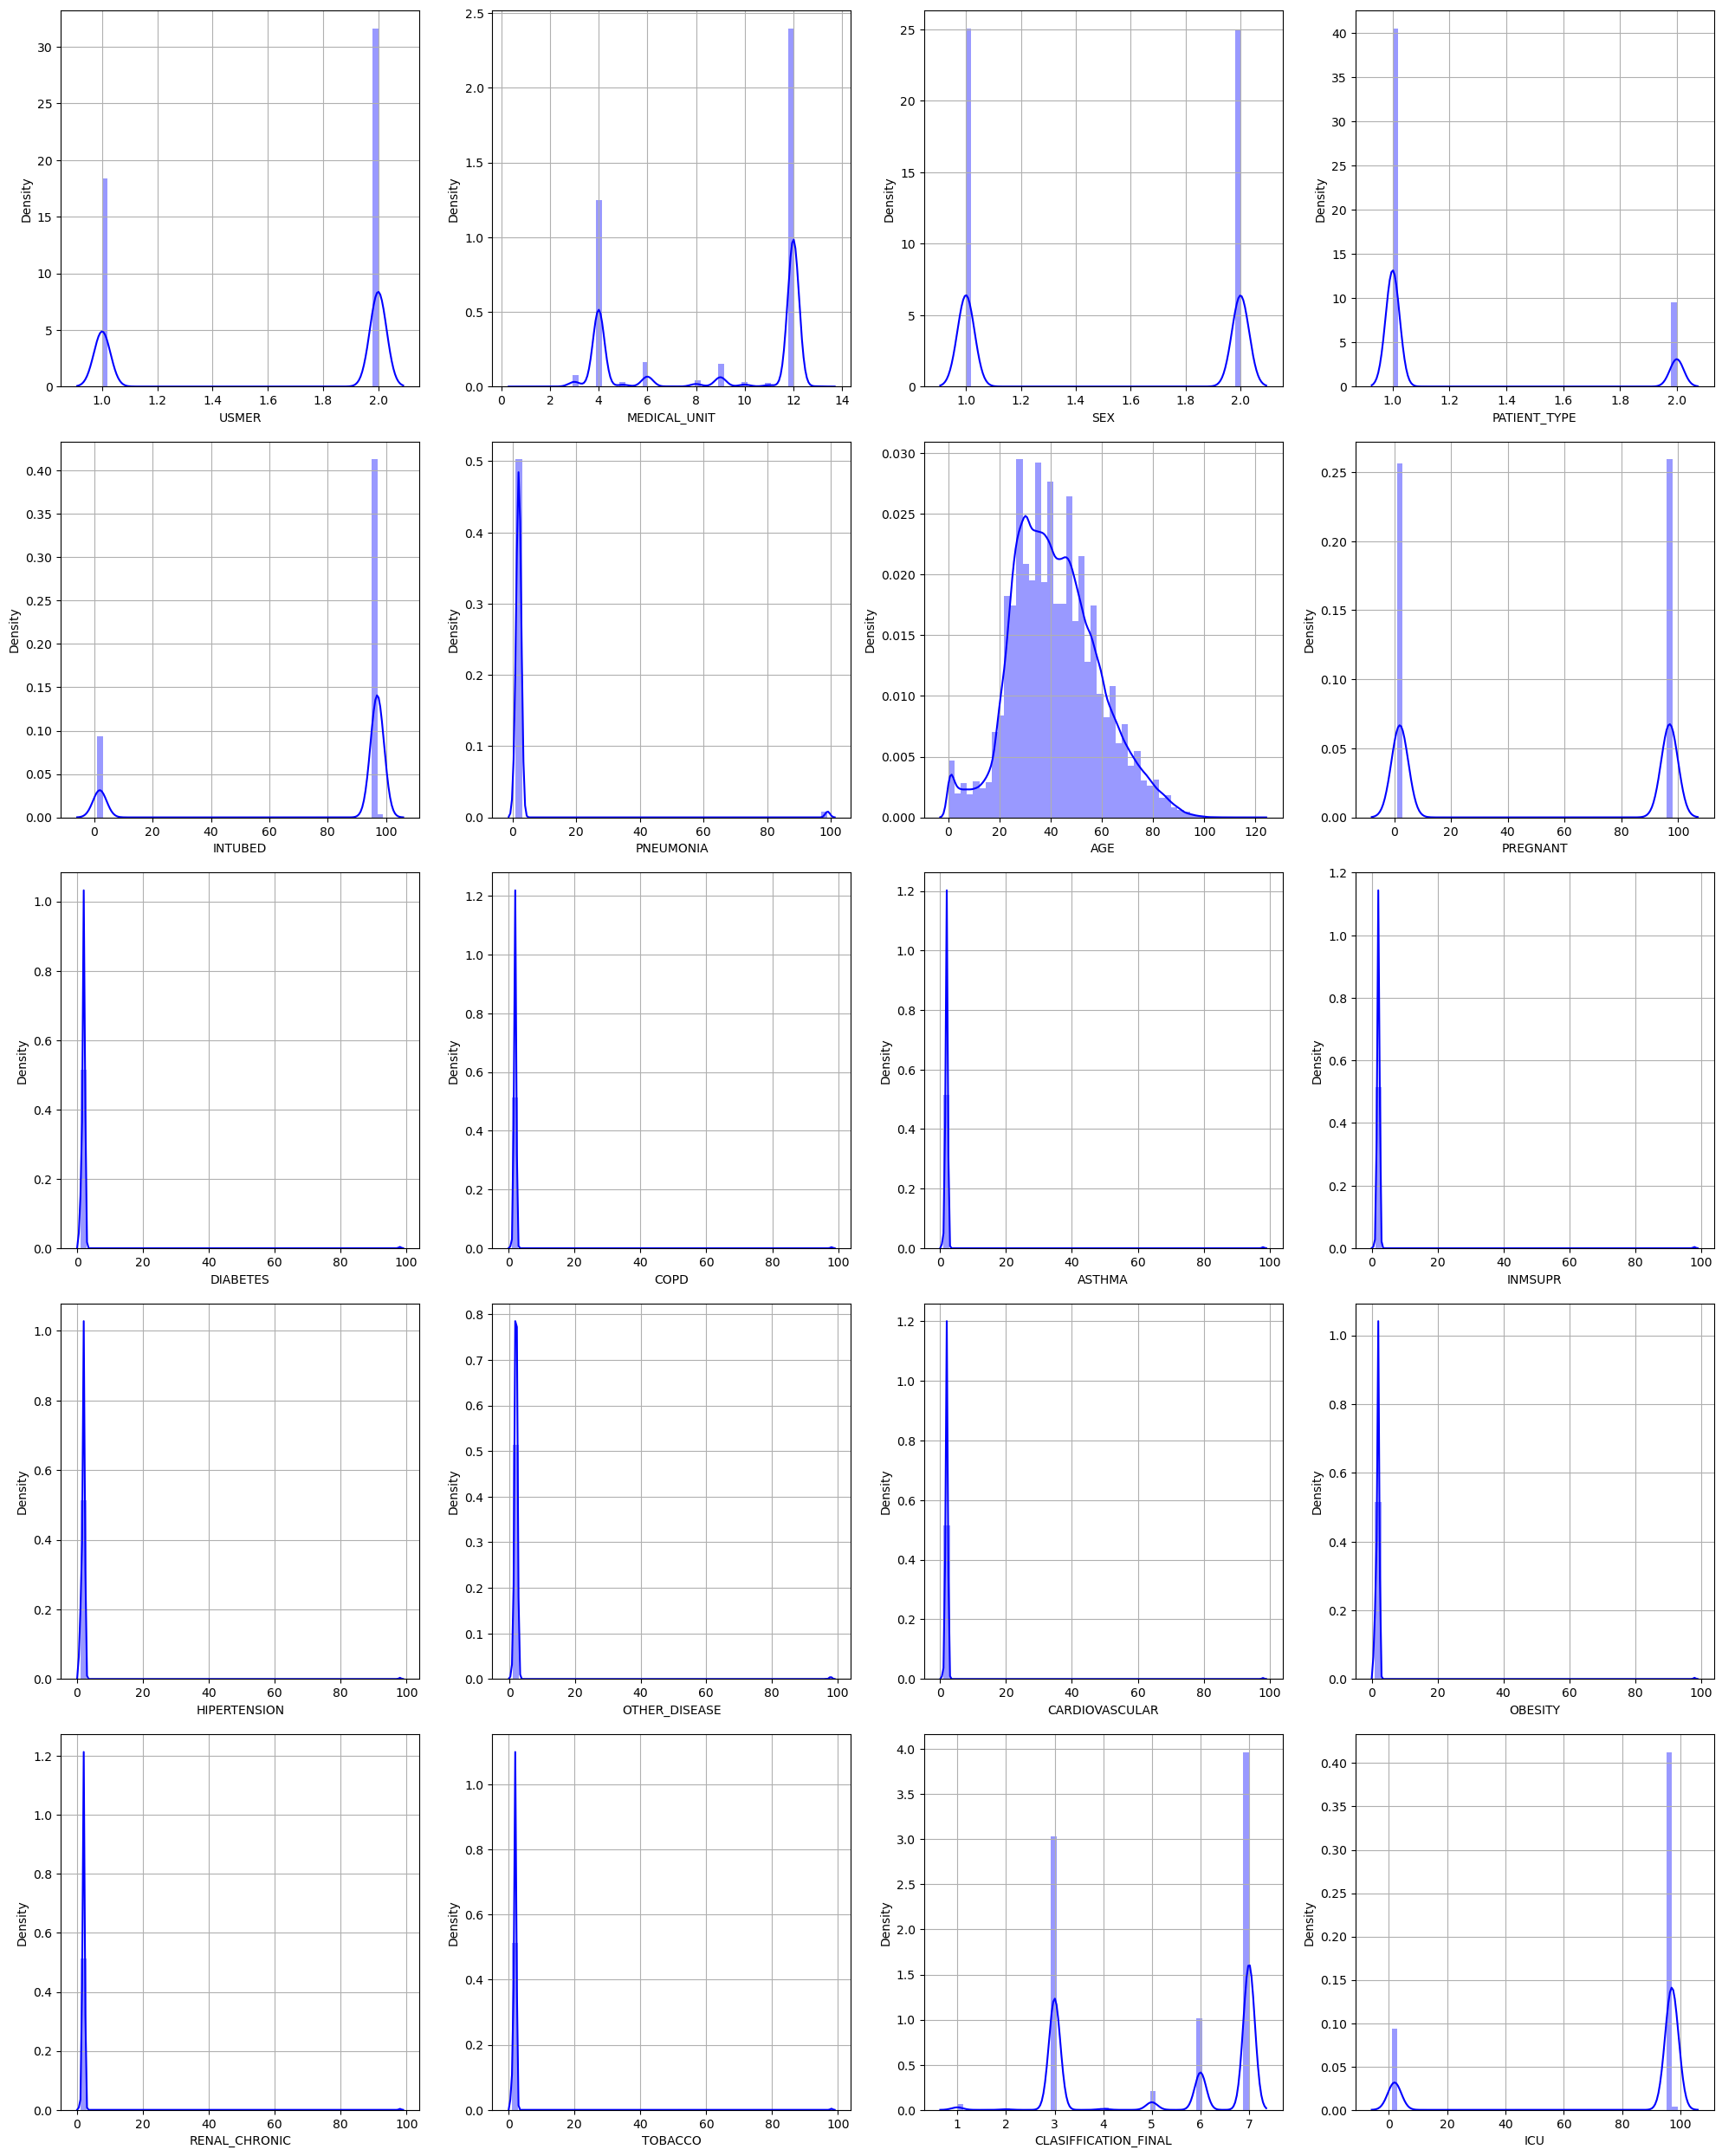

In [22]:
#Exclude non-numeric columns from the plot
numeric_columns = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize = (20, 25))

#Plot the distribution of numeric columns
for i in range(len(numeric_columns)):
    plt.subplot(5, 4, i+1)
    sns.distplot(df[numeric_columns[i]], color='blue')
    plt.grid()

plt.tight_layout()
plt.show()

#### As observed from the above analysis, The "CLASSIFFICATION_FINAL" attribute has values ranging from 1 to 7. But for our ease of action, we are converting the limit starting from 0 to 6.

In [23]:
df['CLASIFFICATION_FINAL'] = df.CLASIFFICATION_FINAL.apply(lambda x: x-1)

In [24]:
df.CLASIFFICATION_FINAL.value_counts()

6    499250
2    381527
5    128133
4     26091
0      8601
3      3122
1      1851
Name: CLASIFFICATION_FINAL, dtype: int64

In [25]:
df.SEX.value_counts()

1    525064
2    523511
Name: SEX, dtype: int64

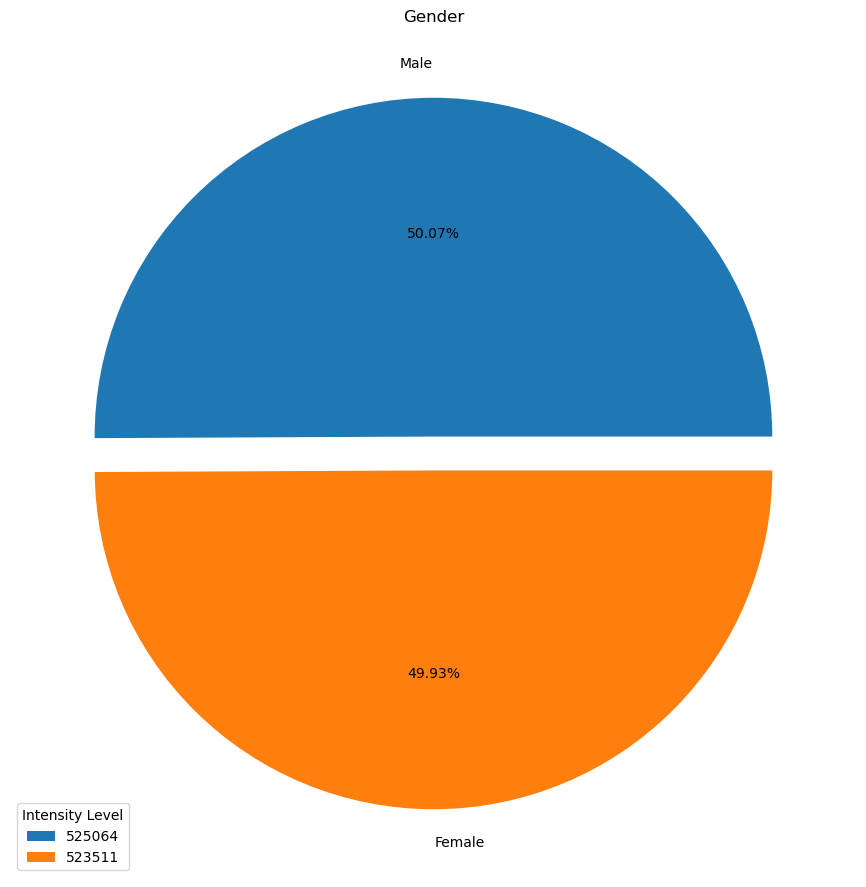

In [26]:
plt.figure(figsize = (15, 11))
plt.title("Gender")
plt.pie(df.SEX.value_counts(), explode = (0.05, 0.05), labels = ['Male', 'Female'],autopct = '%1.2f%%')
plt.legend(df.SEX.value_counts(), loc = 'lower left', title = 'Intensity Level')

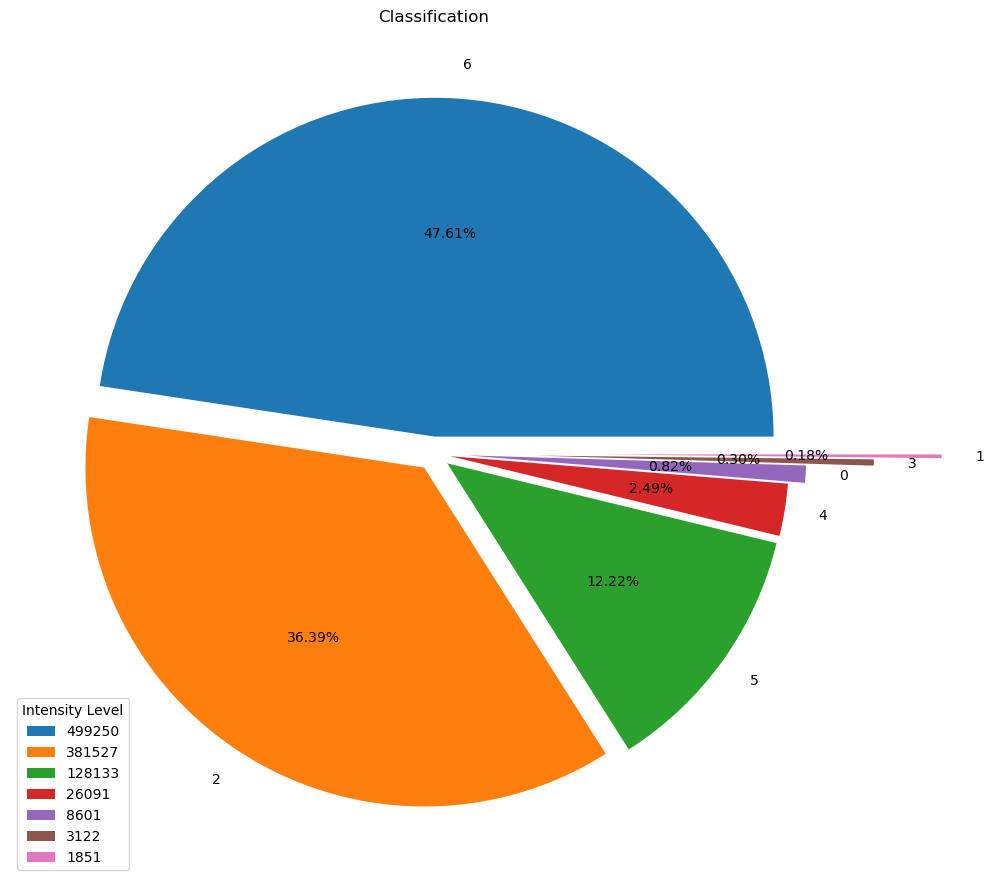

In [27]:
plt.figure(figsize = (15, 11))
plt.title("Classification")
plt.pie(df.CLASIFFICATION_FINAL.value_counts(), explode = (0.05, 0.05, 0.05, 0.05, 0.1, 0.3, 0.5), 
                                    labels = ['6', '2', '5', '4', '0', '3', '1'],autopct = '%1.2f%%')
plt.legend(df.CLASIFFICATION_FINAL.value_counts(), loc = 'lower left', title = 'Intensity Level')

<Axes: title={'center': 'SEX = 2'}, xlabel='CLASIFFICATION_FINAL', ylabel='Density'>

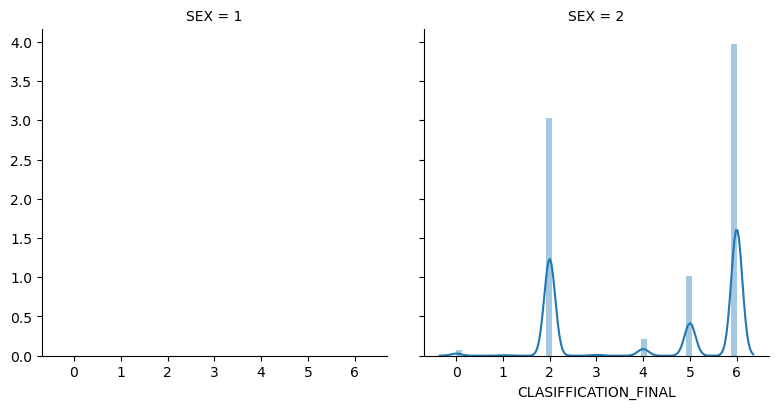

In [28]:
sns.FacetGrid(df, col = 'SEX', height = 4)
sns.distplot(df['CLASIFFICATION_FINAL'])

## Train & Test Split:

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Drop the 'CLASIFFICATION_FINAL' column that contains non-numeric values
x = df.drop('CLASIFFICATION_FINAL', axis=1)

# Convert non-numeric values to NaN
x = x.apply(pd.to_numeric, errors='coerce')

# Impute NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

# Scale the numeric data using StandardScaler
x = StandardScaler().fit_transform(x)

# Print the transformed data
print(x)

[[ 0.76275324 -2.14342559 -0.99852004 ... -0.05008022 -0.0402647
   0.47377997]
 [ 0.76275324 -2.14342559  1.00148216 ... -0.24480886 -0.0402647
   0.47377997]
 [ 0.76275324 -2.14342559  1.00148216 ... -0.05008022 -0.0402647
  -2.10612542]
 ...
 [ 0.76275324  1.07954257  1.00148216 ... -0.05008022 -0.0402647
   0.47377997]
 [ 0.76275324  1.07954257  1.00148216 ... -0.05008022 -0.0402647
   0.47377997]
 [ 0.76275324  1.07954257  1.00148216 ... -0.05008022 -0.0402647
   0.47377997]]


In [30]:
y = df['CLASIFFICATION_FINAL'].values
y

array([2, 4, 2, ..., 6, 6, 6], dtype=int64)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [34]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm)
    cm.plot()

## Logistic Regression:

In [35]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [36]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.5365813340623639
Recall :  0.5365813340623639
Accuracy :  0.5365813340623639
F1 Score :  0.5365813340623639

 [[     0      0    740      0      0      0   1895]
 [     0      0    546      0      0      0     20]
 [     0      0  37824      0      0     14  76580]
 [     0      0    175      0      0      0    741]
 [     0      0   1717      0      0     54   6199]
 [     0      0   7660      0      0   2704  28146]
 [     0      0  20753      0      0    539 128266]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2635
           1       0.00      0.00      0.00       566
           2       0.54      0.33      0.41    114418
           3       0.00      0.00      0.00       916
           4       0.00      0.00      0.00      7970
           5       0.82      0.07  

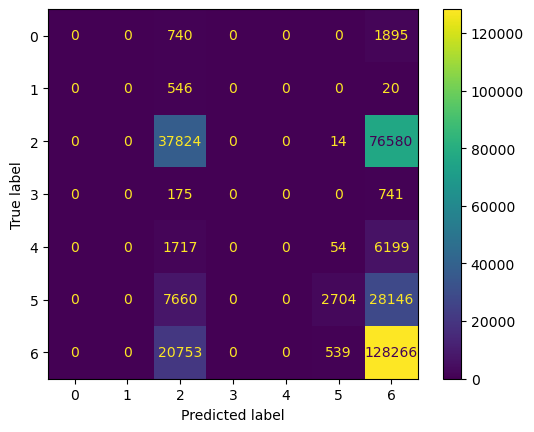

In [37]:
perform(y_pred_lr)

## XGBoost Classifier:

In [38]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [39]:
y_pred_xgb = model_xgb.predict(x_test)

Precision :  0.5495131495710057
Recall :  0.5495131495710057
Accuracy :  0.5495131495710057
F1 Score :  0.5495131495710057

 [[     3      0    792      0      1    222   1617]
 [     0      0    510      0      0     13     43]
 [     1      0  42412      0      1    866  71138]
 [     0      0    182      0      0      2    732]
 [     0      0   1848      0      3    123   5996]
 [     3      1   9700      0      2   4640  24164]
 [     1      0  22022      0     10   1721 125804]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.38      0.00      0.00      2635
           1       0.00      0.00      0.00       566
           2       0.55      0.37      0.44    114418
           3       0.00      0.00      0.00       916
           4       0.18      0.00      0.00      7970
           5       0.61      0.12  

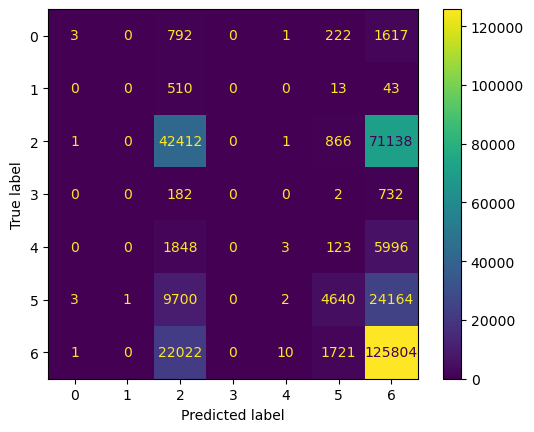

In [40]:
perform(y_pred_xgb)

## XGBRF Classifier:

#### The XGBRFClassifier is an implementation of the XGBoost algorithm using random forests. It is designed for solving classification problems. XGBoost stands for "Extreme Gradient Boosting," which is a powerful machine learning algorithm known for its performance and efficiency.

In [41]:
model_xgbrf = XGBRFClassifier()
model_xgbrf.fit(x_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='multi:softprob', predictor=None, random_state=None,
                reg_alpha=None, ...)

In [42]:
y_pred_xgbrf = model_xgbrf.predict(x_test)

Precision :  0.5410922107110273
Recall :  0.5410922107110273
Accuracy :  0.5410922107110273
F1 Score :  0.5410922107110273

 [[     0      0    914      0      0      0   1721]
 [     0      0    540      0      0      0     26]
 [     0      0  35934      0      0      2  78482]
 [     0      0    175      0      0      0    741]
 [     0      0   1577      0      0     51   6342]
 [     0      0   6700      0      0   2694  29116]
 [     0      0  17455      0      0    518 131585]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2635
           1       0.00      0.00      0.00       566
           2       0.57      0.31      0.40    114418
           3       0.00      0.00      0.00       916
           4       0.00      0.00      0.00      7970
           5       0.83      0.07  

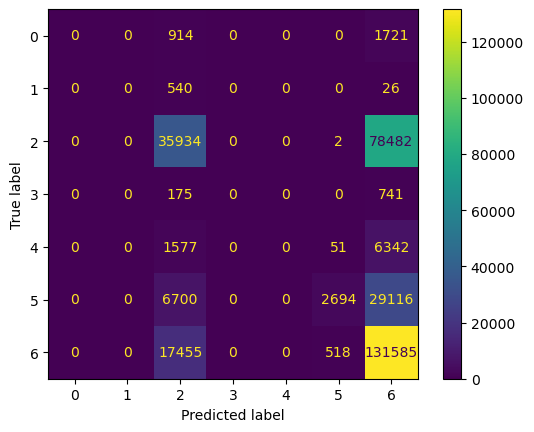

In [43]:
perform(y_pred_xgbrf)

## Decision Tree:

In [44]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [45]:
y_pred_dt = model_dt.predict(x_test)

Precision :  0.5221840399525707
Recall :  0.5221840399525707
Accuracy :  0.5221840399525707
F1 Score :  0.5221840399525707

 [[    86     11    723      4     24    285   1502]
 [     4     10    426      0     14     33     79]
 [   447    249  41200     72    606   3725  68119]
 [     2      1    182      1      0     12    718]
 [    28      5   1957      6     86    343   5545]
 [   227     29  10130     12    167   5850  22095]
 [   302    100  26811     51    666   4596 117032]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.08      0.03      0.05      2635
           1       0.02      0.02      0.02       566
           2       0.51      0.36      0.42    114418
           3       0.01      0.00      0.00       916
           4       0.06      0.01      0.02      7970
           5       0.39      0.15  

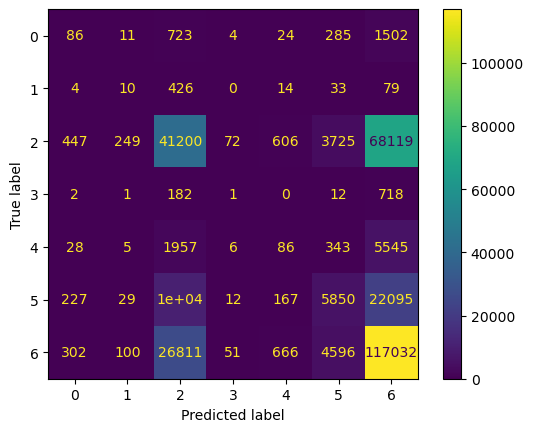

In [46]:
perform(y_pred_dt)

## Random Forest:

In [53]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [54]:
y_pred_rf = model_rf.predict(x_test)

Precision :  0.5271844691057401
Recall :  0.5271844691057401
Accuracy :  0.5271844691057401
F1 Score :  0.5271844691057401

 [[    45      4    718      1     14    299   1554]
 [     2     10    424      0      5     31     94]
 [   218    118  39970     43    407   3523  70139]
 [     0      1    172      1      5      5    732]
 [    11      2   1845      4     56    314   5738]
 [   126     13   9507      8    112   5872  22872]
 [   134     47  24913     32    369   4179 119884]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.08      0.02      0.03      2635
           1       0.05      0.02      0.03       566
           2       0.52      0.35      0.42    114418
           3       0.01      0.00      0.00       916
           4       0.06      0.01      0.01      7970
           5       0.41      0.15  

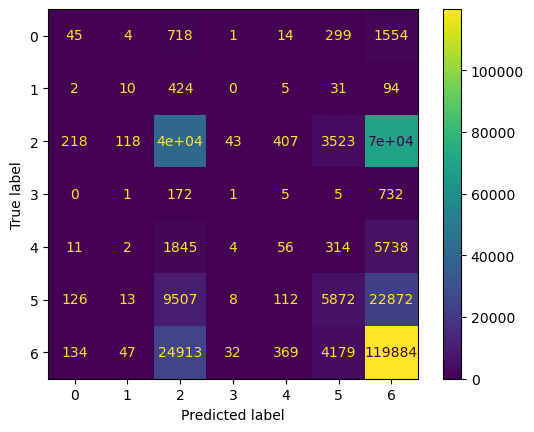

In [55]:
perform(y_pred_rf)

## ADABoost Classifier:

#### AdaBoost (Adaptive Boosting) is a machine learning ensemble method that combines multiple weak classifiers to create a strong classifier. It is a boosting algorithm that iteratively adjusts the weights of training instances based on their classification accuracy. 

In [56]:
model_ada = AdaBoostClassifier()
model_ada.fit(x_train, y_train)

AdaBoostClassifier()

In [57]:
y_pred_ada = model_ada.predict(x_test)

Precision :  0.532951016139338
Recall :  0.532951016139338
Accuracy :  0.532951016139338
F1 Score :  0.532951016139338

 [[     0     16    818      0      0      3   1798]
 [     0     36    512      0      0      2     16]
 [     0   1226  39958      0      0     42  73192]
 [     0      0    178      0      0      1    737]
 [     0     25   1827      0      0    111   6007]
 [     0    121   9119      0      0   1702  27568]
 [     0    315  22127      0      0   1160 125956]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2635
           1       0.02      0.06      0.03       566
           2       0.54      0.35      0.42    114418
           3       0.00      0.00      0.00       916
           4       0.00      0.00      0.00      7970
           5       0.56      0.04      

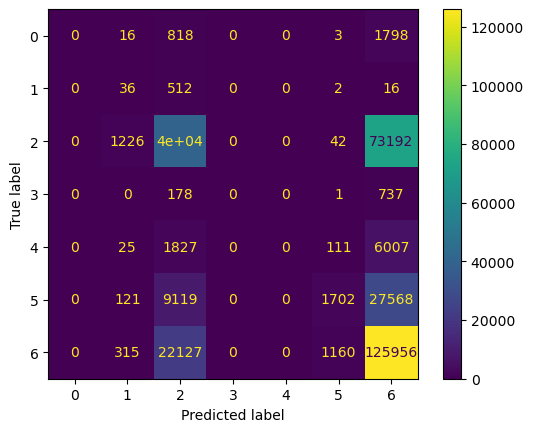

In [58]:
perform(y_pred_ada)

## ExtraTrees Classifier:

#### ExtraTrees Classifier, short for Extremely Randomized Trees Classifier, is an ensemble machine learning algorithm that belongs to the family of decision tree-based methods. It is a variant of the Random Forest algorithm, which combines multiple decision trees to create a powerful classifier.

In [59]:
model_etc = ExtraTreesClassifier()
model_etc.fit(x_train, y_train)

ExtraTreesClassifier()

In [60]:
y_pred_etc = model_etc.predict(x_test)

Precision :  0.5254360673039327
Recall :  0.5254360673039327
Accuracy :  0.5254360673039327
F1 Score :  0.5254360673039327

 [[    67      9    758      1     17    275   1508]
 [     1     10    432      0      6     34     83]
 [   365    187  41616     39    463   3434  68314]
 [     0      1    186      1      3     10    715]
 [    20      4   1956      3     64    310   5613]
 [   190     26  10072     12    124   5891  22195]
 [   223     77  26855     32    472   4260 117639]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.08      0.03      0.04      2635
           1       0.03      0.02      0.02       566
           2       0.51      0.36      0.42    114418
           3       0.01      0.00      0.00       916
           4       0.06      0.01      0.01      7970
           5       0.41      0.15  

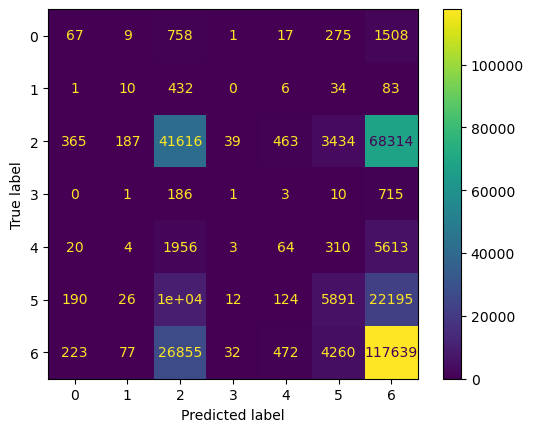

In [61]:
perform(y_pred_etc)

## GradientBoosting Classifier:

#### GradientBoosting Classifier is a popular machine learning algorithm that belongs to the boosting family of ensemble methods. It is used for classification tasks and is based on the concept of building an ensemble of weak prediction models, typically decision trees, and combining their predictions to make a final prediction.

In [63]:
model_gbc = GradientBoostingClassifier()
model_gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [64]:
y_pred_gbc = model_gbc.predict(x_test)

Precision :  0.5473769204604336
Recall :  0.5473769204604336
Accuracy :  0.5473769204604336
F1 Score :  0.5473769204604336

 [[     0      0    933      0      0     14   1688]
 [     0      0    524      0      0      5     37]
 [     0      0  41416      0      0    368  72634]
 [     0      0    179      0      0      0    737]
 [     1      0   1809      0      0     85   6075]
 [     0      0   9319      0      0   3760  25431]
 [     0      0  21290      0      0   1254 127014]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2635
           1       0.00      0.00      0.00       566
           2       0.55      0.36      0.44    114418
           3       0.00      0.00      0.00       916
           4       0.00      0.00      0.00      7970
           5       0.69      0.10  

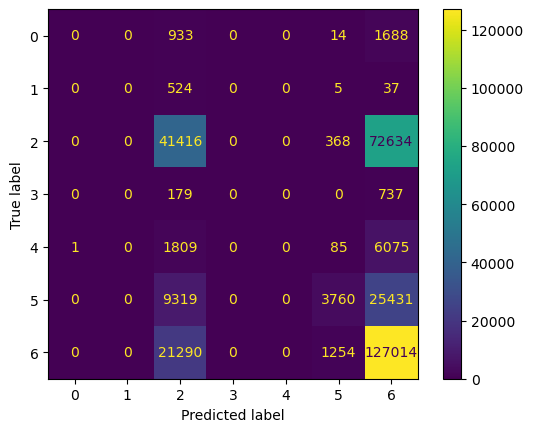

In [65]:
perform(y_pred_gbc)

## MLP:

#### MLP stands for Multilayer Perceptron, which is a type of artificial neural network commonly used in machine learning for classification and regression tasks. MLP is a feedforward neural network, meaning that information flows through the network in one direction, from the input layer to the output layer, without any loops or feedback connections.

In [66]:
model_mlp = MLPClassifier()
model_mlp.fit(x_train, y_train)

MLPClassifier()

In [67]:
y_pred_mlp = model_mlp.predict(x_test)

Precision :  0.5440358835627979
Recall :  0.5440358835627979
Accuracy :  0.5440358835627979
F1 Score :  0.5440358835627979

 [[     1      0   1065      0      0     77   1492]
 [     0      0    542      0      0      1     23]
 [     4      0  50201      0      2   1270  62941]
 [     0      0    215      0      0      1    700]
 [     0      0   2384      0      0    159   5427]
 [     1      0  13110      0      0   5202  20197]
 [     2      0  31113      4      3   2701 115735]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.12      0.00      0.00      2635
           1       0.00      0.00      0.00       566
           2       0.51      0.44      0.47    114418
           3       0.00      0.00      0.00       916
           4       0.00      0.00      0.00      7970
           5       0.55      0.14  

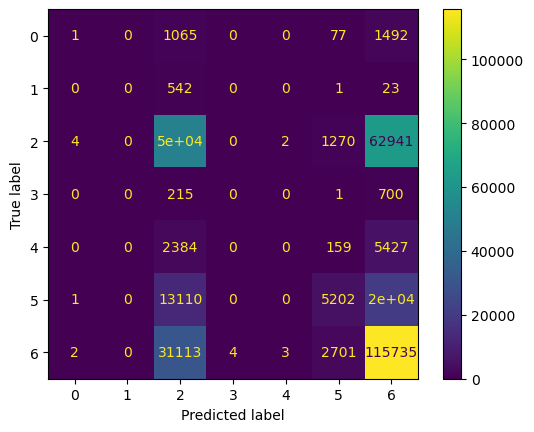

In [68]:
perform(y_pred_mlp)

## Conclusion:

### Though we have applied machine learning techniques to classify COVID and gathered an accuracy of ~55%, but Doctor's decision will be considered and treated as final, as he/she takes that decision based on certain parameters, comorbidities and experience gathered over years.
